<a href="https://colab.research.google.com/github/artiboi2002/AFRL-Intern-Project-Data-Poisoning-Attacks-Using-DP-SGD/blob/main/experiment_2_1_backdoor_attack_cnn_no_dp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/drive/MyDrive/AFRL-Intern-Project-Data-Poisoning-Attacks-Using-DP-SGD')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
from torchvision.utils import make_grid
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [ ]:
from models.cnn import ConvolutionalNeuralNetwork
from utils.trainingFunction import trainingFunction
from utils.back_door_attack import apply_backdoor_attack

In [ ]:
transform = transforms.ToTensor() #converting MNIST Image into tensor of 4 dimensions(image, height, wdith, color channel)
#Train Data
trainData = datasets.MNIST(root ='/cnn_data', train = True, download = True, transform = transform)
trainData = apply_backdoor_attack(trainData, trigger_label=0, poison_fraction=0.01) #in the training data we apply backdoor attack. #In the training data we include label flipping attack
#Test Data
testData = datasets.MNIST(root = '/cnn_data', train = False, download = True, transform = transform)

trainLoader = DataLoader(trainData, batch_size=10, shuffle = True)
testLoader = DataLoader(testData, batch_size=10, shuffle = False)

torch.manual_seed(41)
model = ConvolutionalNeuralNetwork()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.001) #Smaller the learning rate the longer is gonna take to train
epochs = 15

train_loss, test_loss, train_correct, test_correct = trainingFunction(
    model, trainLoader, testLoader, epochs, criterion, optimizer
)

Epoch: 1, Batch 600, Loss  2.2880
Epoch: 1, Batch 1200, Loss  2.2817
Epoch: 1, Batch 1800, Loss  2.2930
Epoch: 1, Batch 2400, Loss  2.2955
Epoch: 1, Batch 3000, Loss  2.2849
Epoch: 1, Batch 3600, Loss  2.3059
Epoch: 1, Batch 4200, Loss  2.2950
Epoch: 1, Batch 4800, Loss  2.2841
Epoch: 1, Batch 5400, Loss  2.2866
Epoch: 1, Batch 6000, Loss  2.2671
Epoch 1 — Train Accuracy: 21.86%
Epoch 1 — Test Accuracy: 33.01%
Epoch: 2, Batch 600, Loss  2.2509
Epoch: 2, Batch 1200, Loss  2.2515
Epoch: 2, Batch 1800, Loss  2.2607
Epoch: 2, Batch 2400, Loss  2.1726
Epoch: 2, Batch 3000, Loss  2.0348
Epoch: 2, Batch 3600, Loss  1.6078
Epoch: 2, Batch 4200, Loss  1.2058
Epoch: 2, Batch 4800, Loss  1.0027
Epoch: 2, Batch 5400, Loss  0.6414
Epoch: 2, Batch 6000, Loss  0.9010
Epoch 2 — Train Accuracy: 48.57%
Epoch 2 — Test Accuracy: 77.19%
Epoch: 3, Batch 600, Loss  0.6813
Epoch: 3, Batch 1200, Loss  0.4697
Epoch: 3, Batch 1800, Loss  0.4441
Epoch: 3, Batch 2400, Loss  0.2544
Epoch: 3, Batch 3000, Loss  0.871

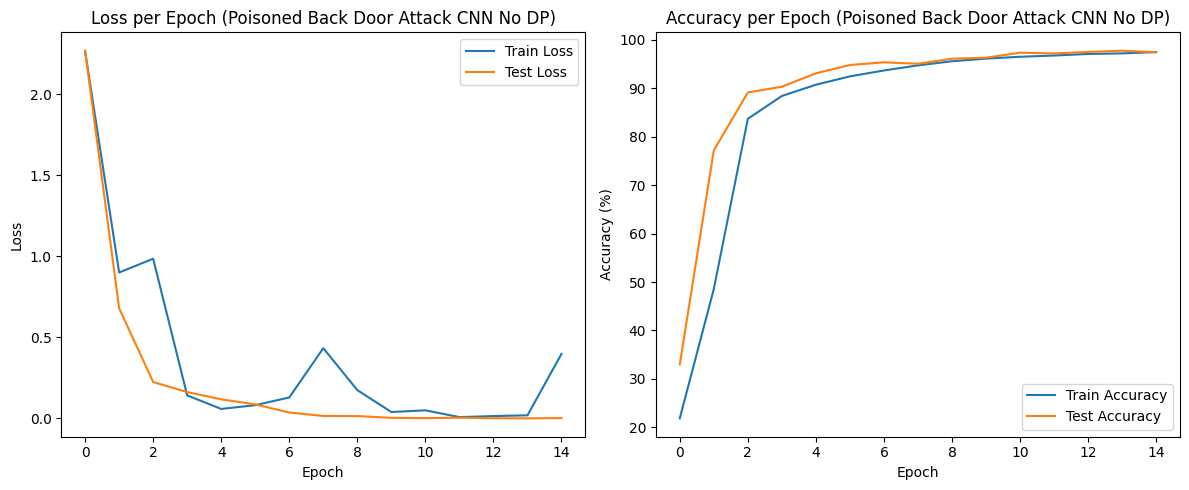

In [ ]:
def compute_accuracy(correct_list, total_samples):
    return [100 * (x / total_samples) for x in correct_list]

train_acc = compute_accuracy(train_correct, len(trainLoader.dataset))
test_acc = compute_accuracy(test_correct, len(testLoader.dataset))

plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.plot(test_loss, label='Test Loss')
plt.title('Loss per Epoch (Poisoned Back Door Attack CNN No DP)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train Accuracy')
plt.plot(test_acc, label='Test Accuracy')
plt.title('Accuracy per Epoch (Poisoned Back Door Attack CNN No DP)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.legend()

plt.tight_layout()
plt.show()